In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/hammadali08/Vidoes/CSV file/Diabetes.csv")
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

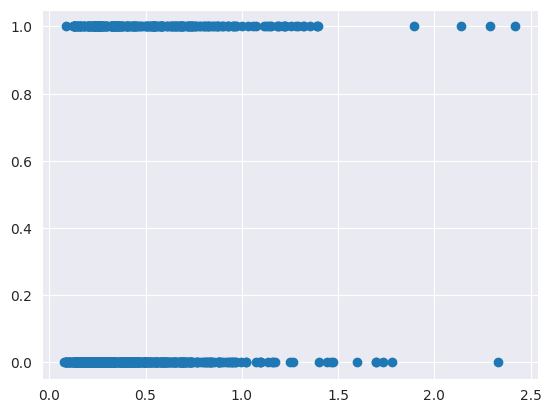

In [5]:
plt.scatter(data['DiabetesPedigreeFunction'],data['Outcome'])
plt.show()

In [6]:
x=data[['DiabetesPedigreeFunction']]
y=data['Outcome']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=28)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lg=LogisticRegression()

In [11]:
lg.fit(x_train,y_train)

LogisticRegression()

In [12]:
lg.score(x_train,y_train)

0.6579804560260586

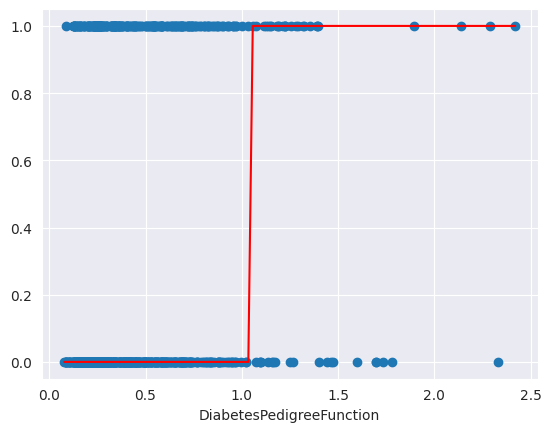

In [13]:
plt.scatter(data['DiabetesPedigreeFunction'],data['Outcome'])
sns.lineplot(x=data['DiabetesPedigreeFunction'],y=lg.predict(x),color='red')
plt.show()

In [14]:
lg.predict([[0.232]])

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [15]:
X= data.iloc[:,:-1]
Y=data['Outcome']

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
lg.fit(X_train,Y_train)

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
lg.score(X_train,Y_train)

0.7703583061889251

In [19]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [20]:
lg.coef_

array([[ 0.06106262,  0.0337888 , -0.01387792,  0.00474554, -0.0019446 ,
         0.10151985,  0.59002294,  0.03768787]])

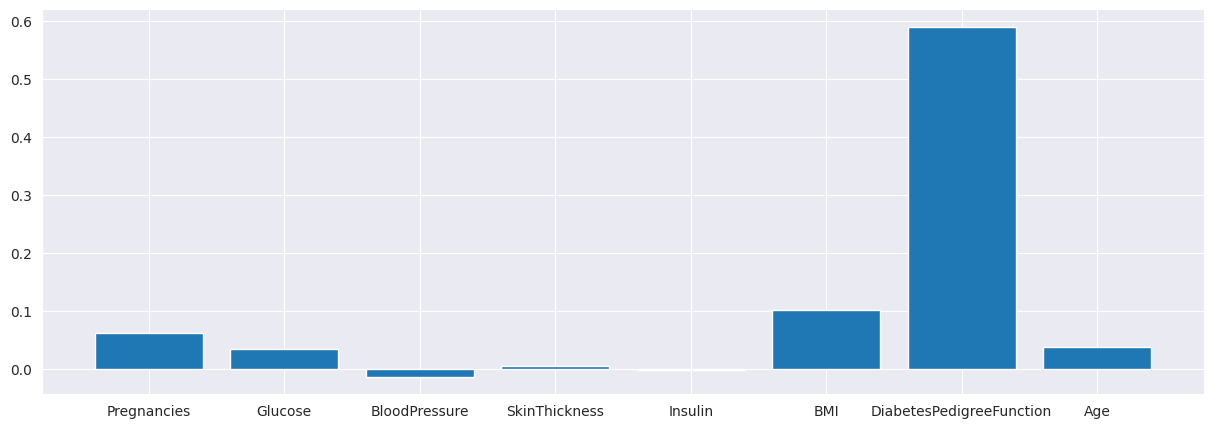

In [21]:
plt.figure(figsize=(15,5))
plt.bar(X.columns, lg.coef_[0])
plt.show()

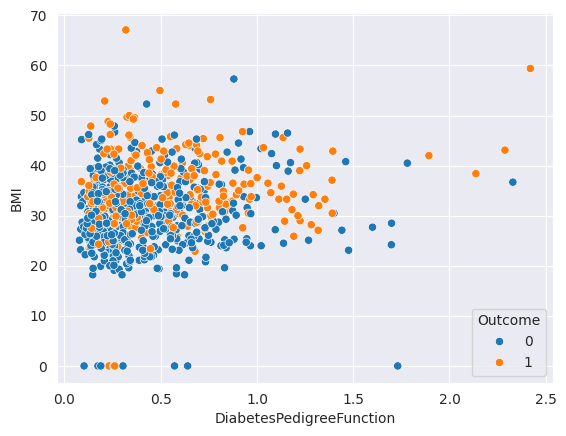

In [32]:
sns.scatterplot(x=data['DiabetesPedigreeFunction'],y=data['BMI'],color='red', hue=data['Outcome'])
plt.show()

In [33]:
x1=data[['BMI','DiabetesPedigreeFunction']]
y1=data['Outcome']

In [44]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=47)

In [45]:
lg.fit(x1_train,y1_train)

LogisticRegression()

In [46]:
lg.score(x1_test,y1_test)

0.7662337662337663

In [47]:
from mlxtend.plotting import plot_decision_regions

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

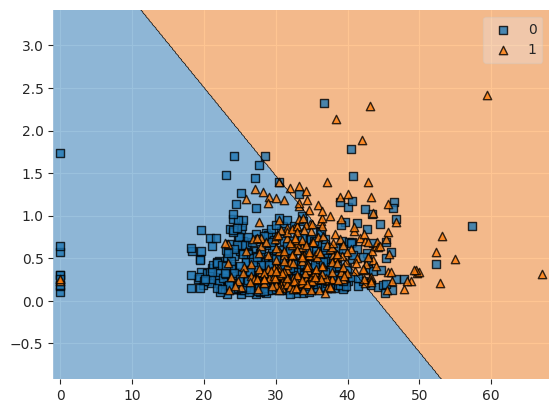

In [48]:
plot_decision_regions(x1.to_numpy(),y1.to_numpy(),clf=lg)